## Anggota Kelompok
### Salman Faris / 123230024
### M Syahrial Abidin / 123230027
### Gusti Rama / 123230040

# Import Library

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Akses Dataset

In [3]:
df = pd.read_csv('ObesityDataSet.csv')

# Info dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
# Check for missing values
print(df.isnull().sum())
# There are no missing values in the dataset
# Display basic statistics
print(df.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%  

## Menambah Kolom BMI agar mempermudah visualisasi

In [6]:
# Calculate BMI and add it as a new column
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
df['BMI'] = df['BMI'].round(2)

# Mengecek Kualitas Dataset

### Cek Missing Value

In [7]:
#missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64


### Cek Data Duplikat

In [8]:
df.duplicated().sum()

np.int64(24)

### Menyortir data numeric dan categorical

In [9]:
numerical_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(include=['object'])

### Mengecek outlier

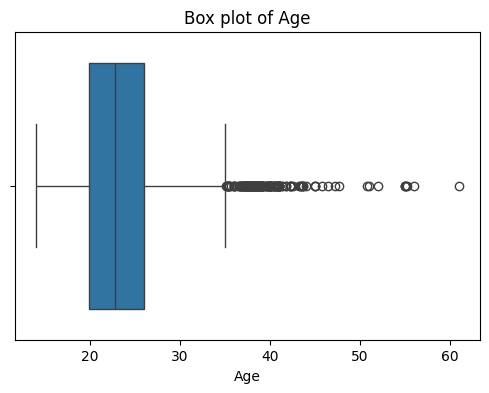

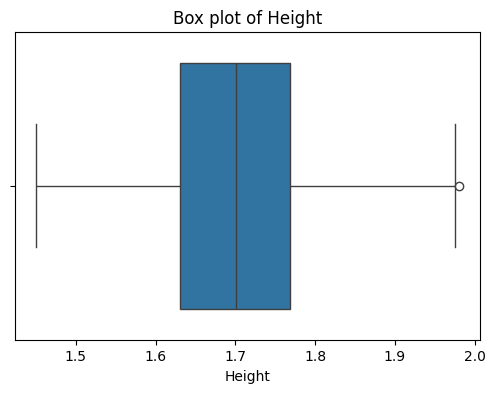

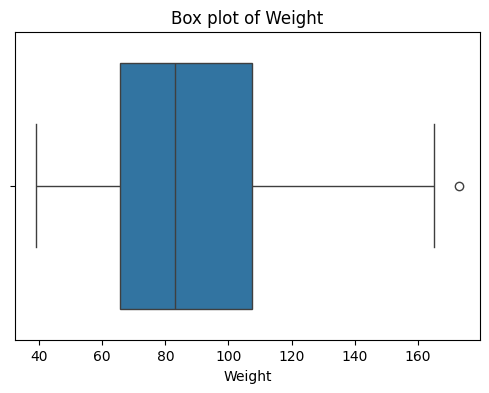

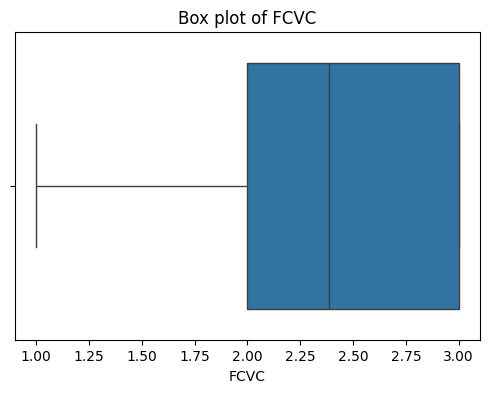

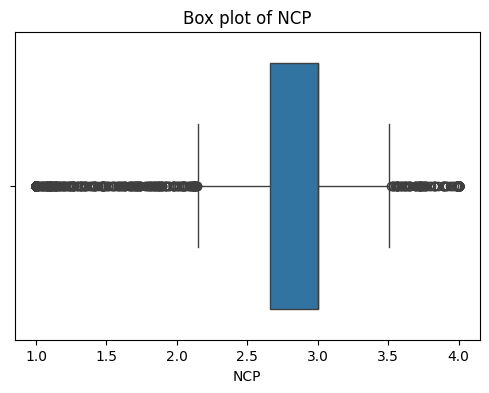

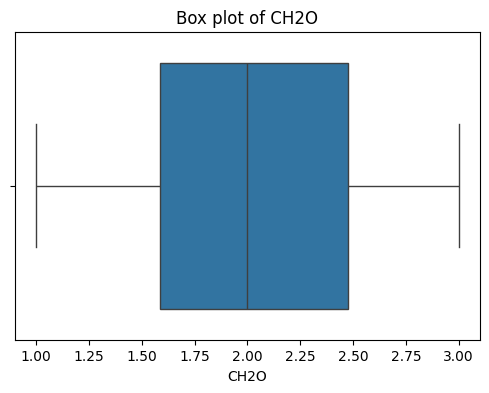

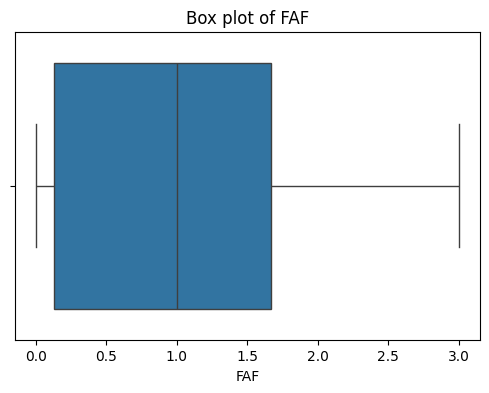

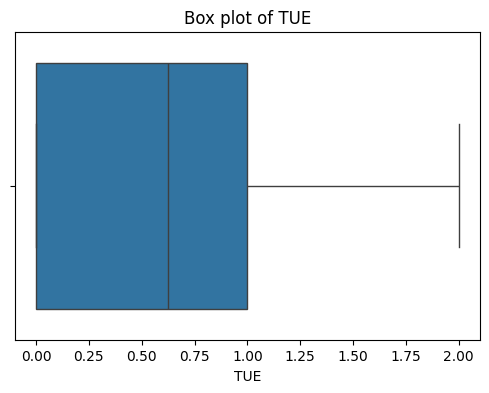

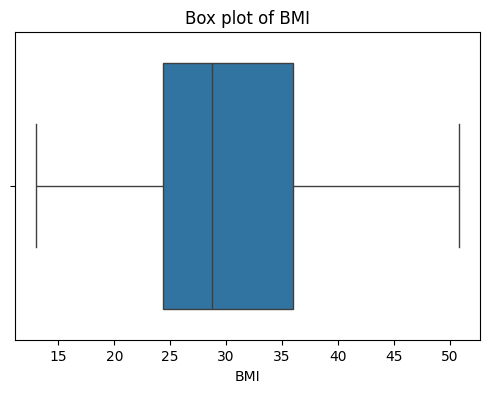

In [10]:
#Outlier numerical data
for column in numerical_data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numerical_data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

## EDA 

### Distribusi data categorical

In [11]:
print("Statistical Summary of Numerical Data:\n", numerical_data.describe())

Statistical Summary of Numerical Data:
                Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE          BMI  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866    29.700137  
std       0.612953     0.850592     0.608927     8.011354  
min       1.000000     0.000000     0.000000    13.00

In [12]:
# Univariate analysis - Categorical data
print("numerical_data columns:", df["Gender"].value_counts())
print("Family History of Overweight:", df["family_history_with_overweight"].value_counts())
print("FAVC (Frequent consumption of high caloric food):", df["FAVC"].value_counts())
print("CAEC (Consumption of food between meals):", df["CAEC"].value_counts())
print("SMOKE (Smoking habit):", df["SMOKE"].value_counts())
print("SCC (Consumption of alcohol):", df["SCC"].value_counts())
print("CALC (Physical activity frequency):", df["CALC"].value_counts())
print("MTRANS (Transportation used):", df["MTRANS"].value_counts())
print("NObeyesdad (Obesity level):", df["NObeyesdad"].value_counts())


numerical_data columns: Gender
Male      1068
Female    1043
Name: count, dtype: int64
Family History of Overweight: family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
FAVC (Frequent consumption of high caloric food): FAVC
yes    1866
no      245
Name: count, dtype: int64
CAEC (Consumption of food between meals): CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
SMOKE (Smoking habit): SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC (Consumption of alcohol): SCC
no     2015
yes      96
Name: count, dtype: int64
CALC (Physical activity frequency): CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS (Transportation used): MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad (Obesity level): N

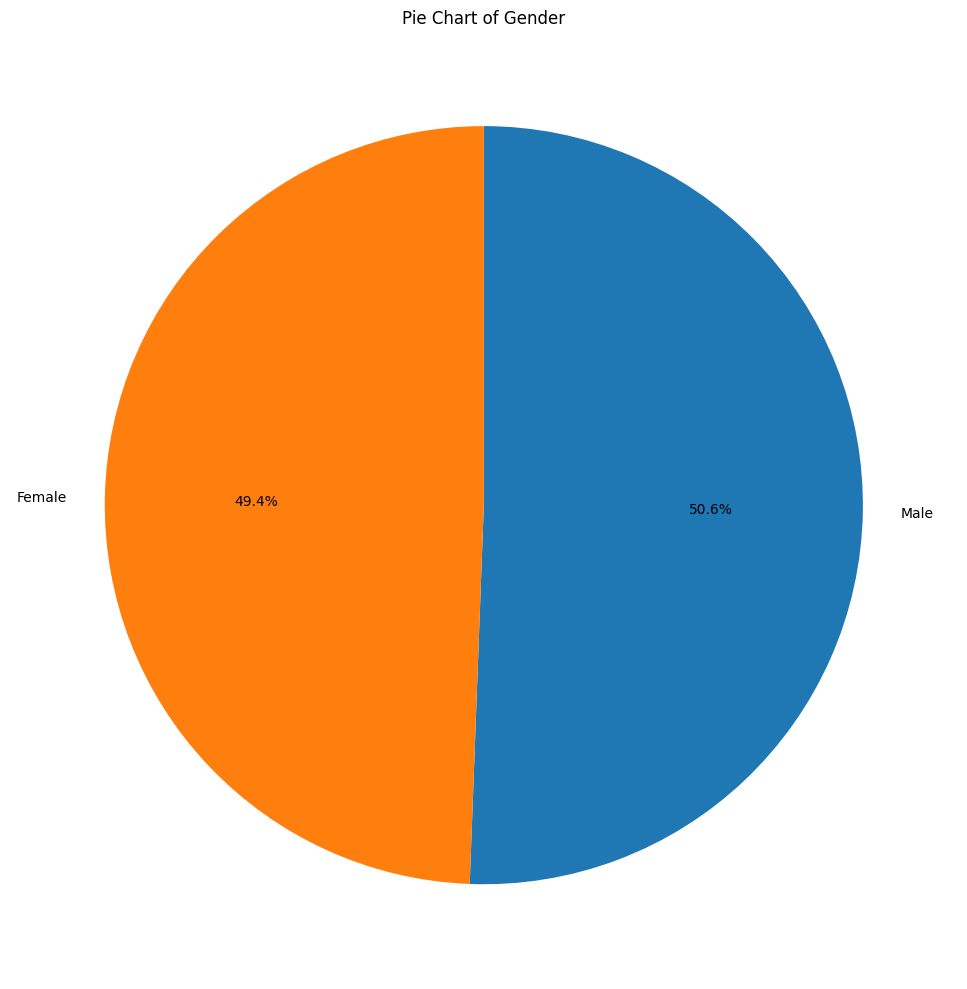

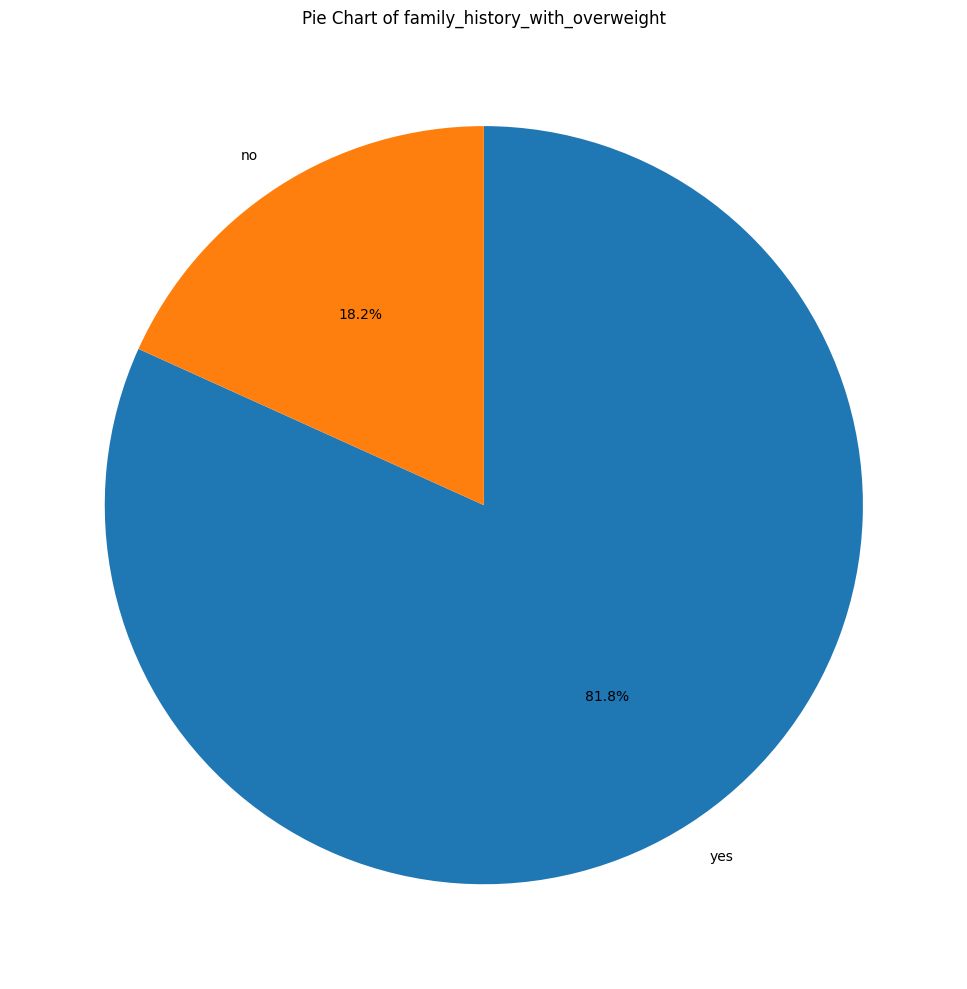

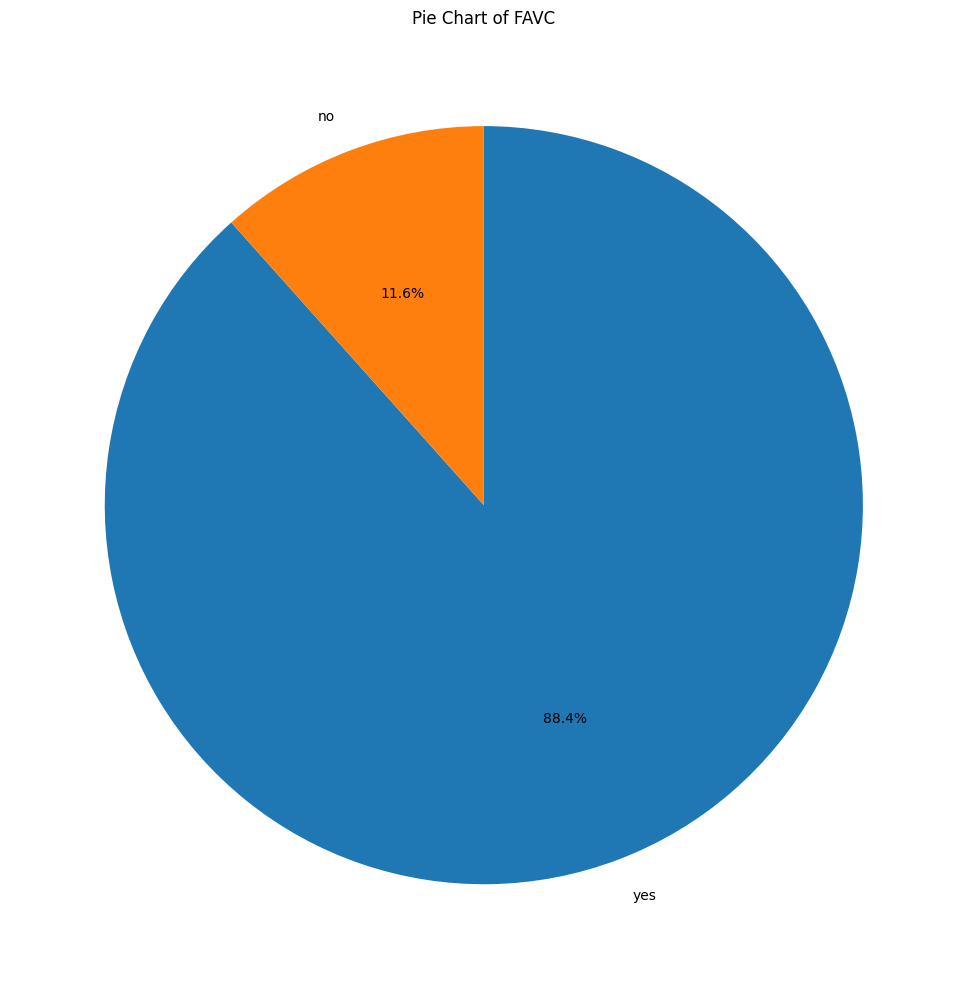

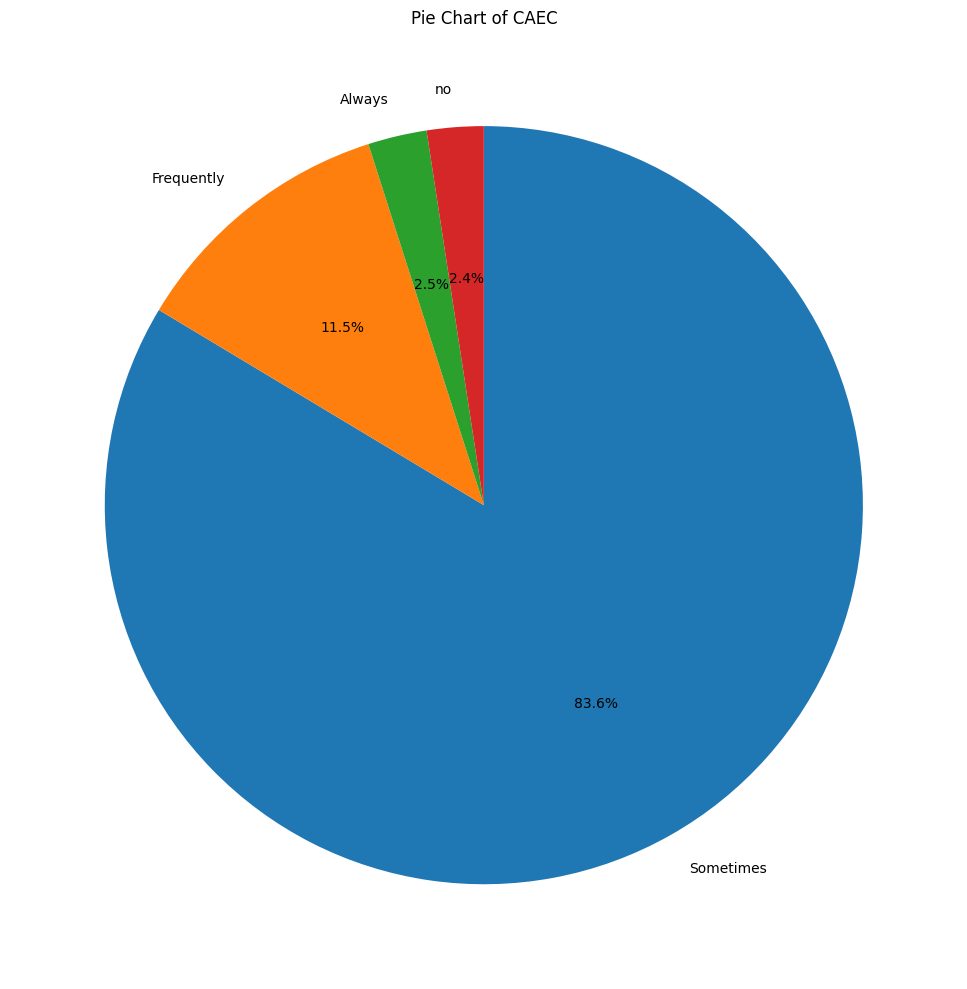

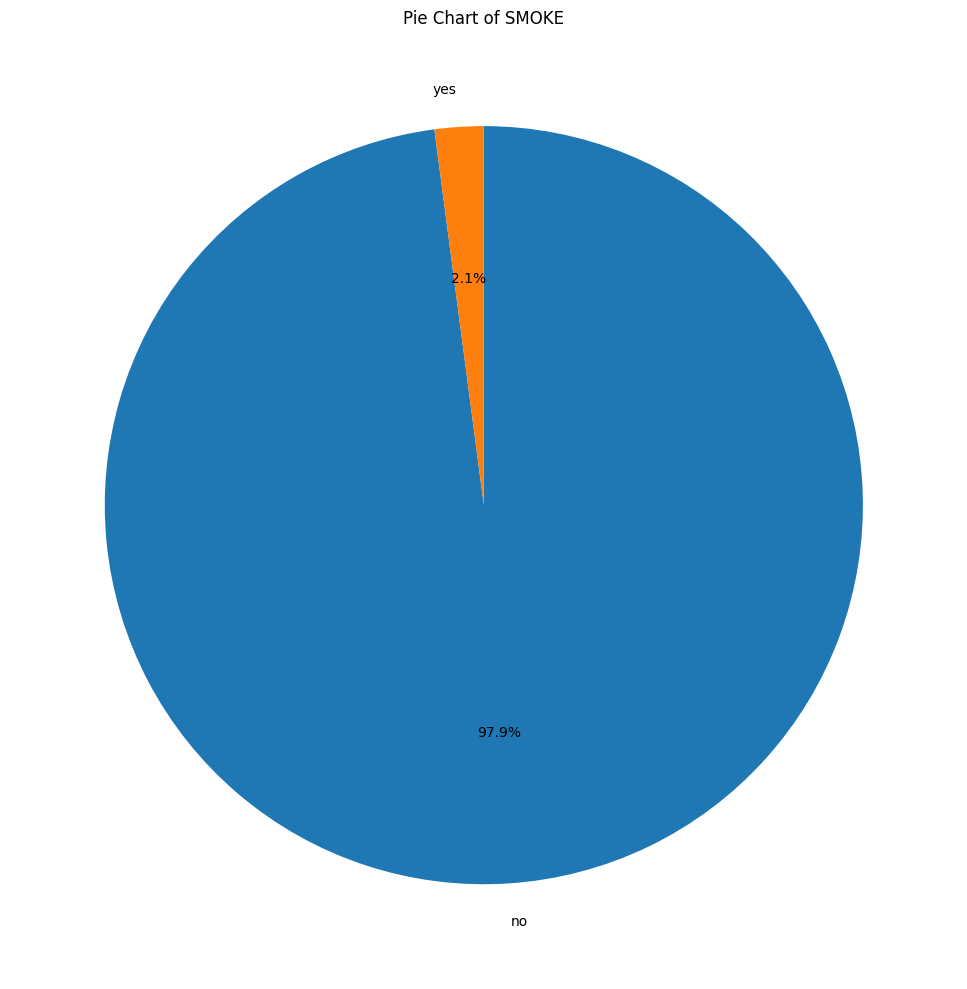

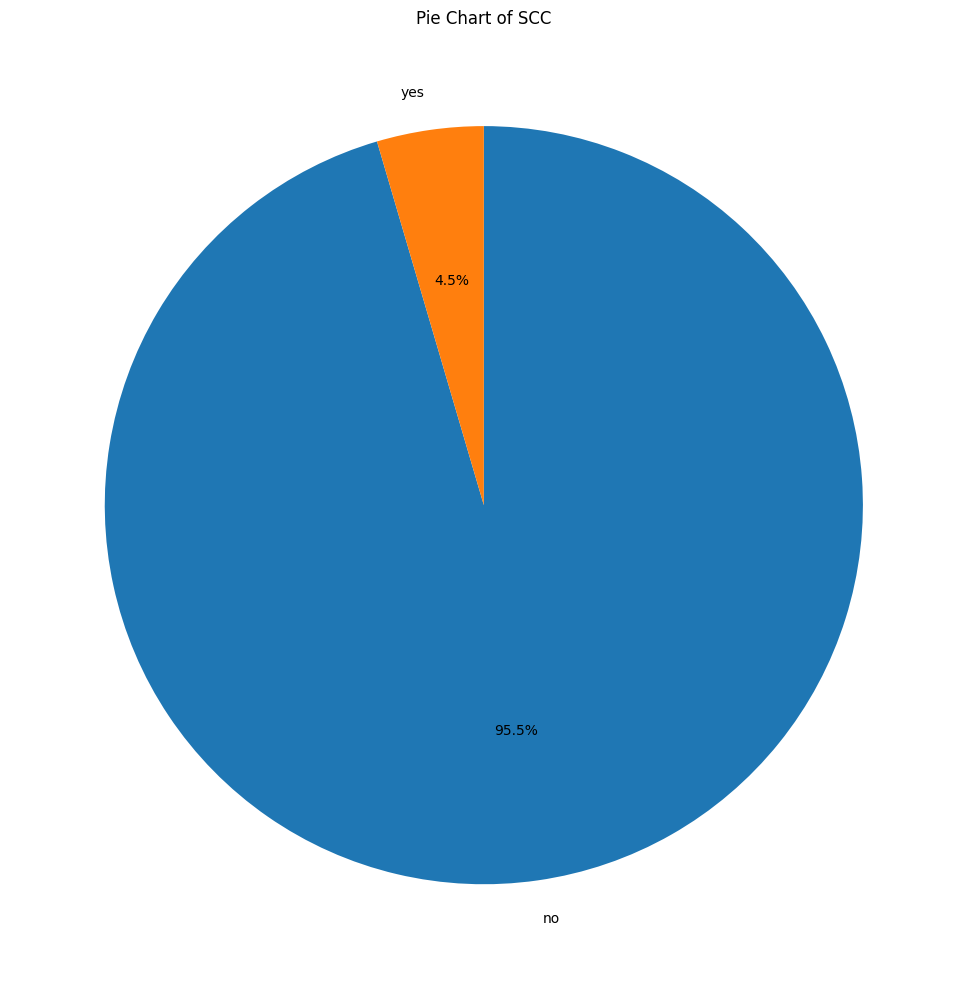

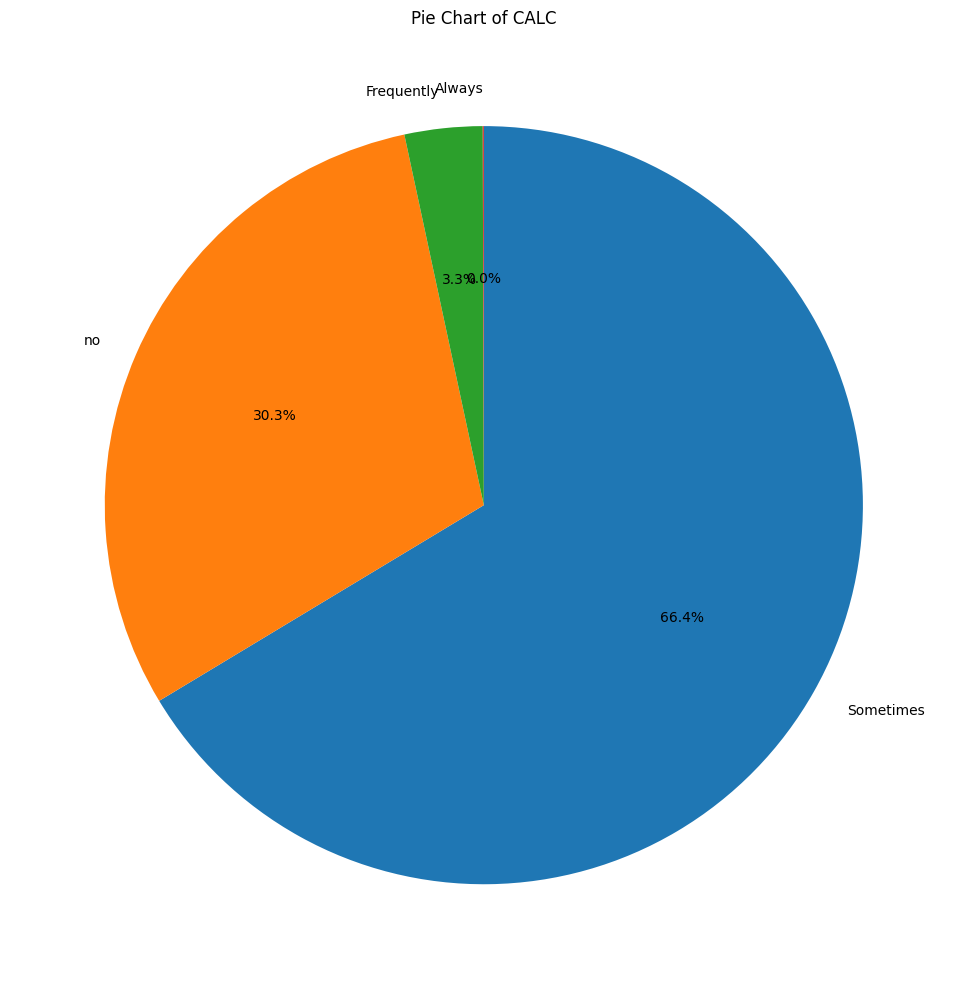

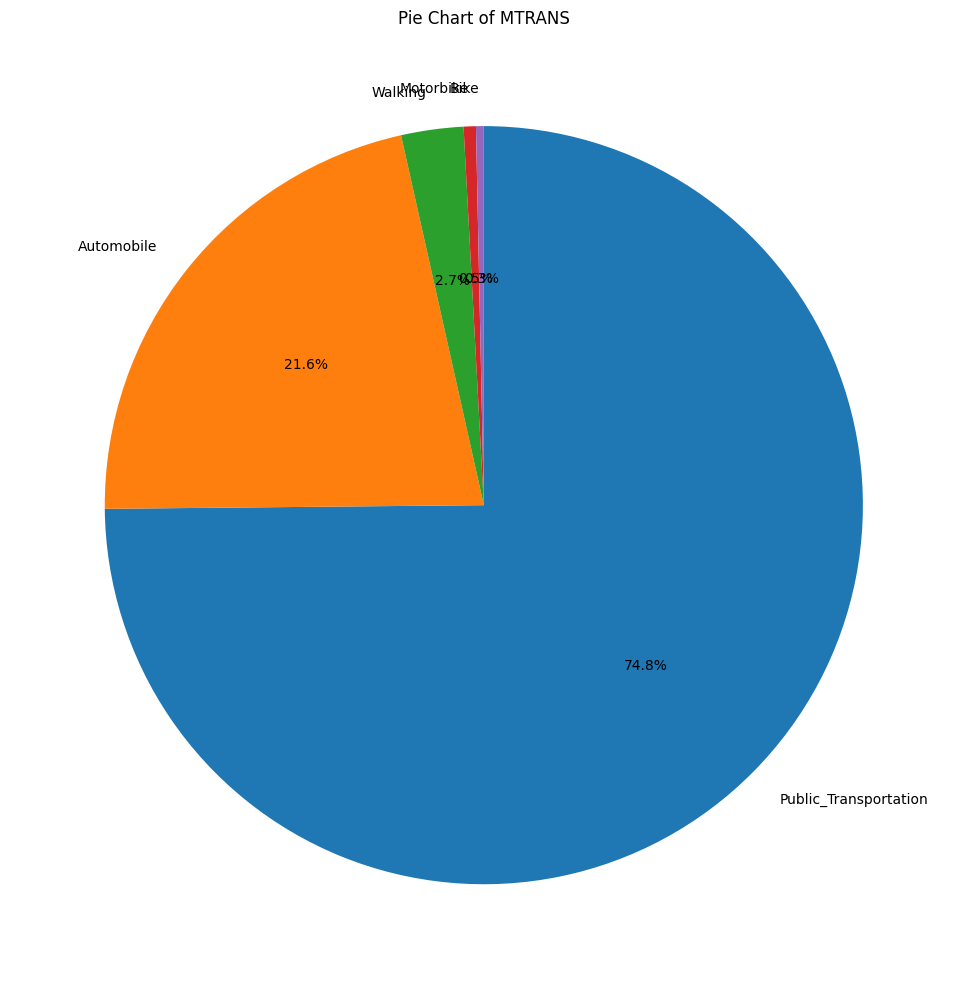

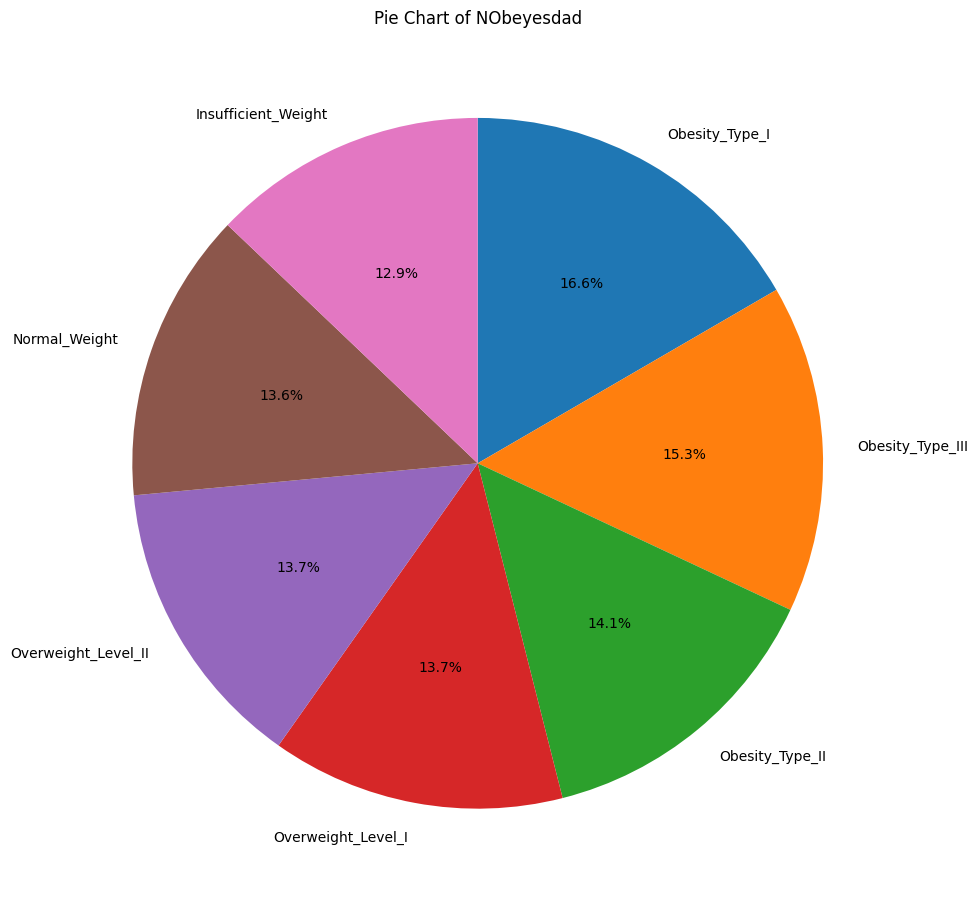

In [13]:
#Distribusi categorical data
for column in categorical_data.columns:
    plt.figure(figsize=(10, 10))
    
    # Hitung jumlah tiap kategori
    counts = categorical_data[column].value_counts()
    
    # Buat pie chart
    plt.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%',   # tampilkan persentase
        startangle=90,       # rotasi awal biar rapi
        counterclock=False   # urutan searah jarum jam
    )
    
    plt.title(f'Pie Chart of {column}')
    plt.tight_layout()
    plt.show()

### Distribusi data numerical


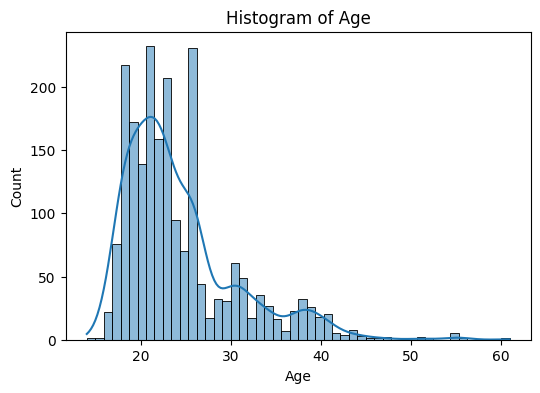

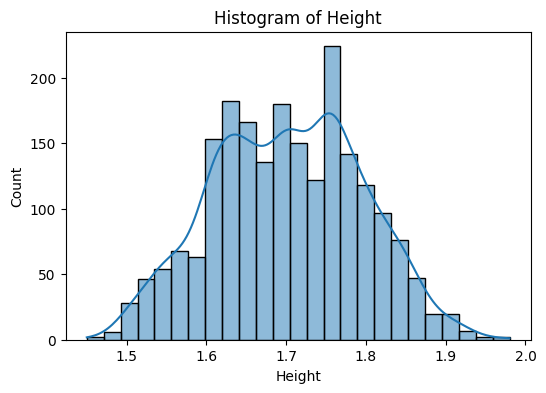

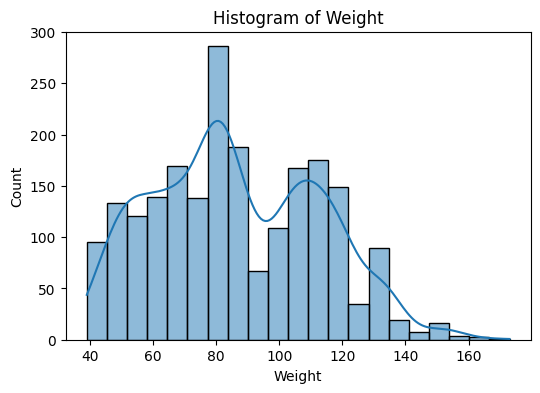

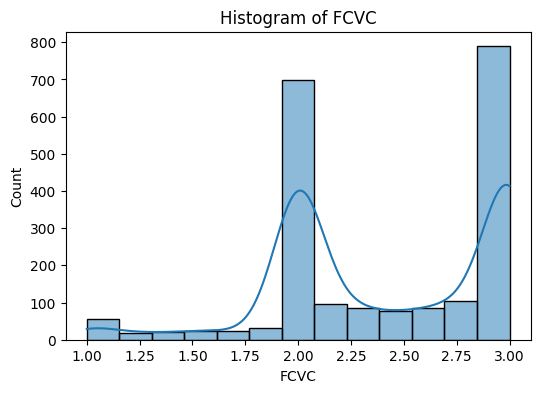

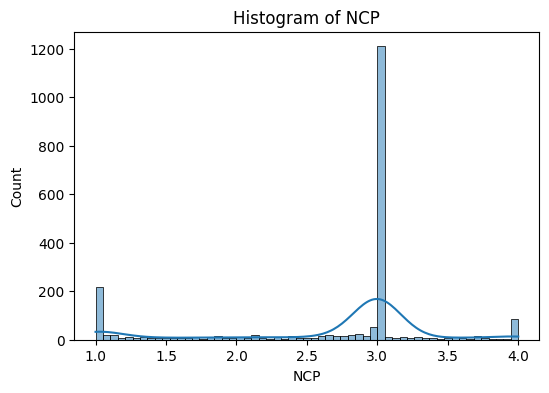

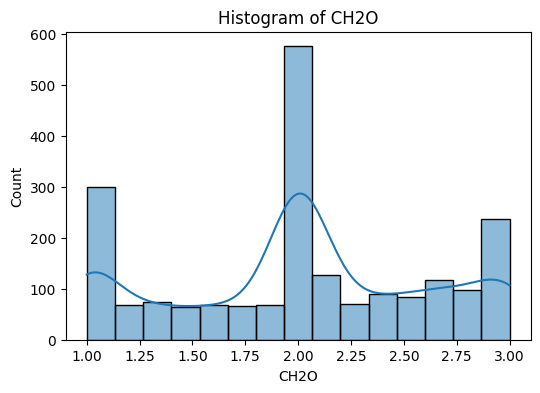

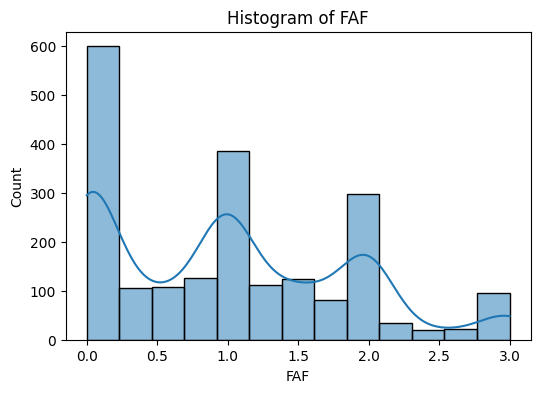

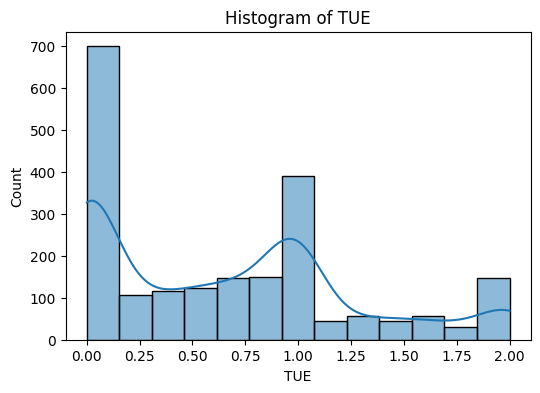

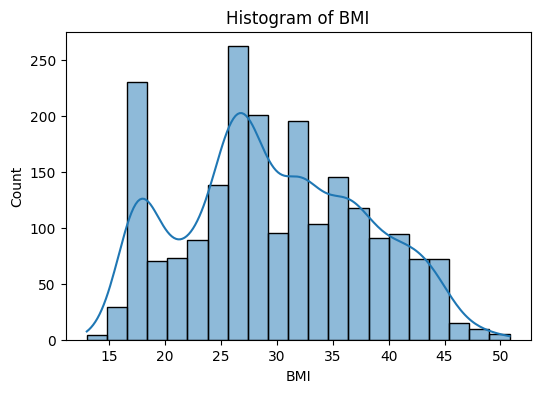

In [14]:
#Distribusi numerical data
for column in numerical_data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(numerical_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

### Distribusi data numerik berdasarkan BMI

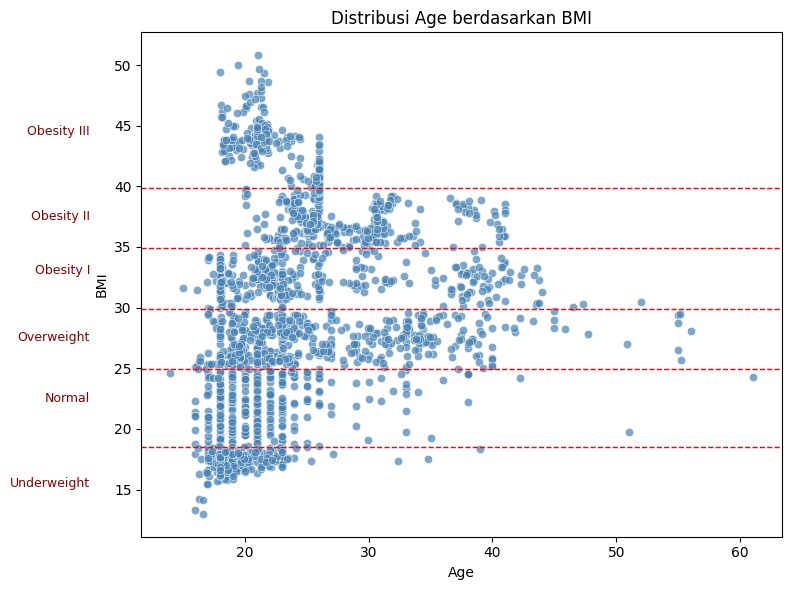

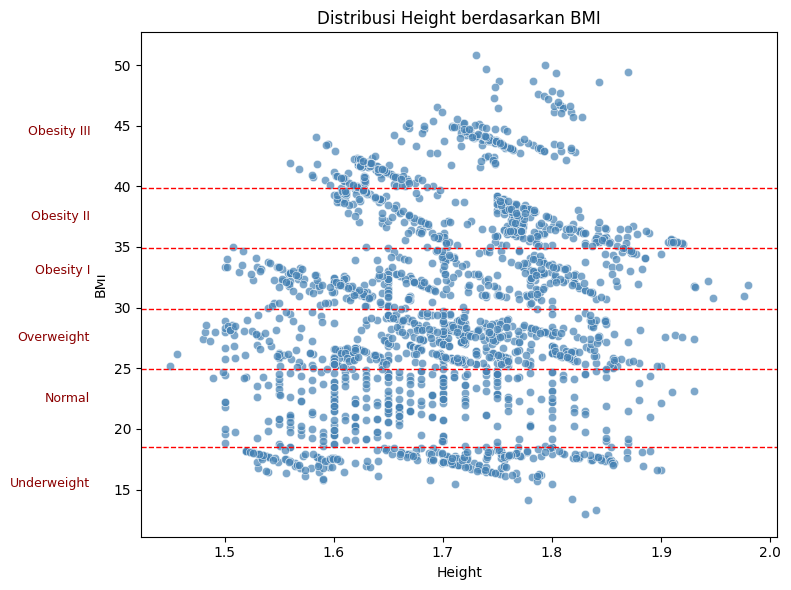

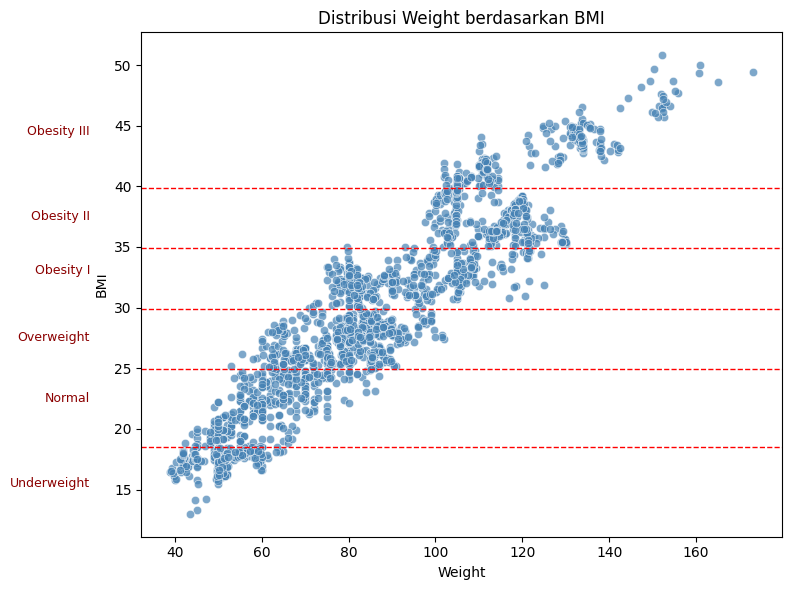

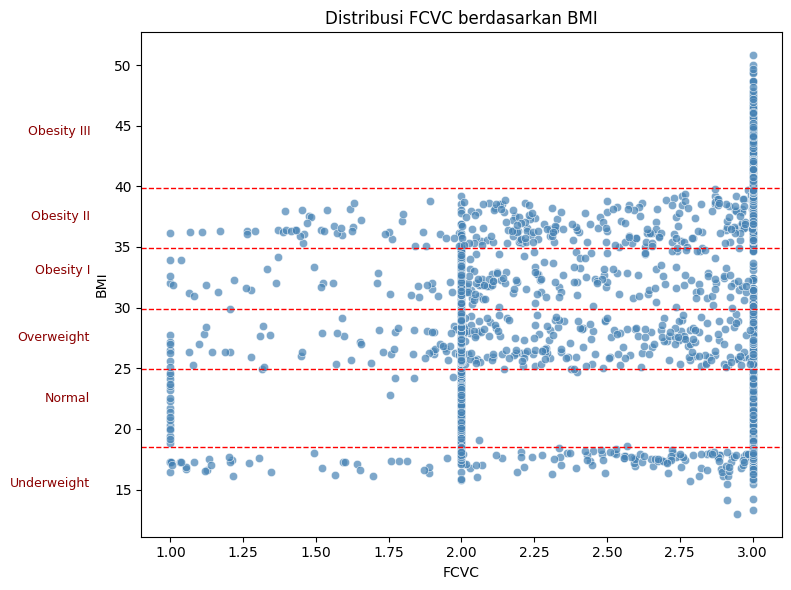

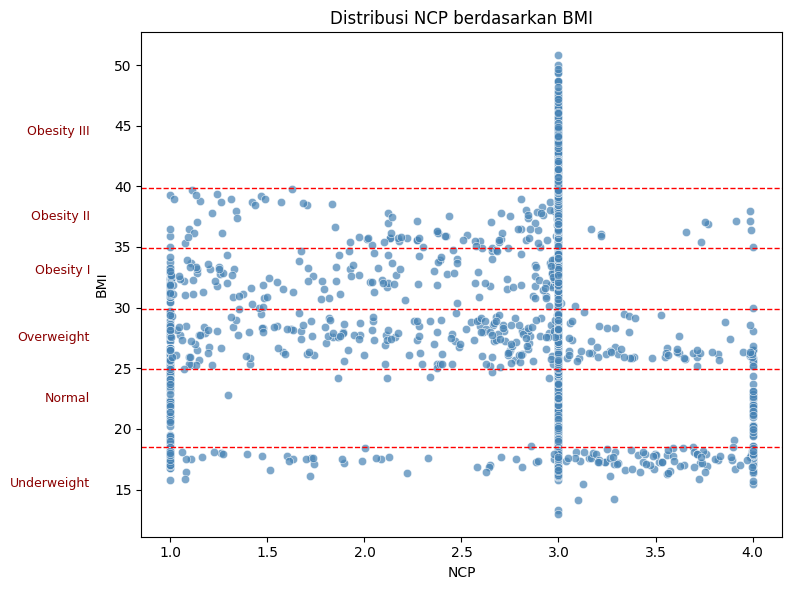

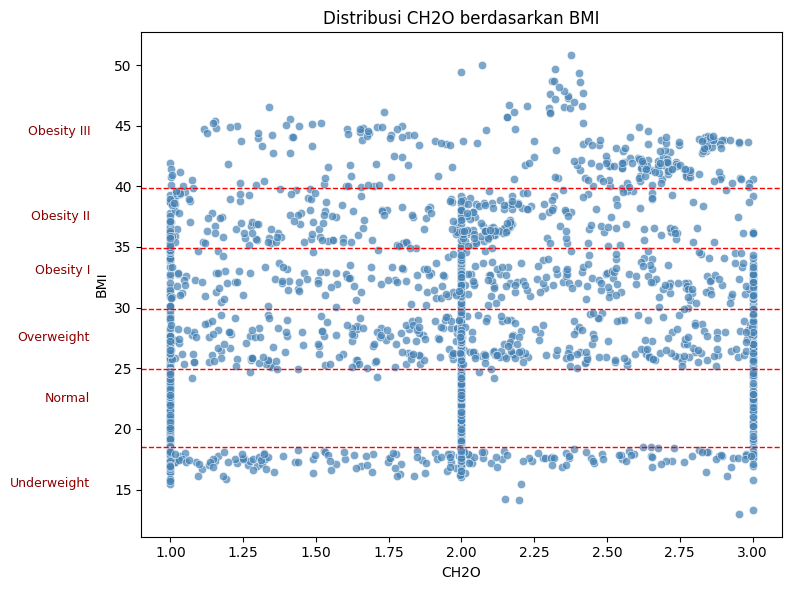

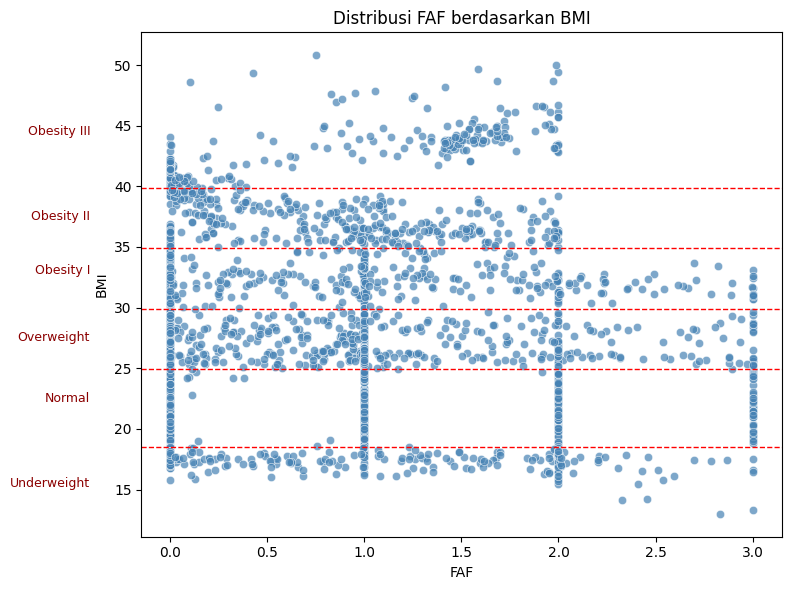

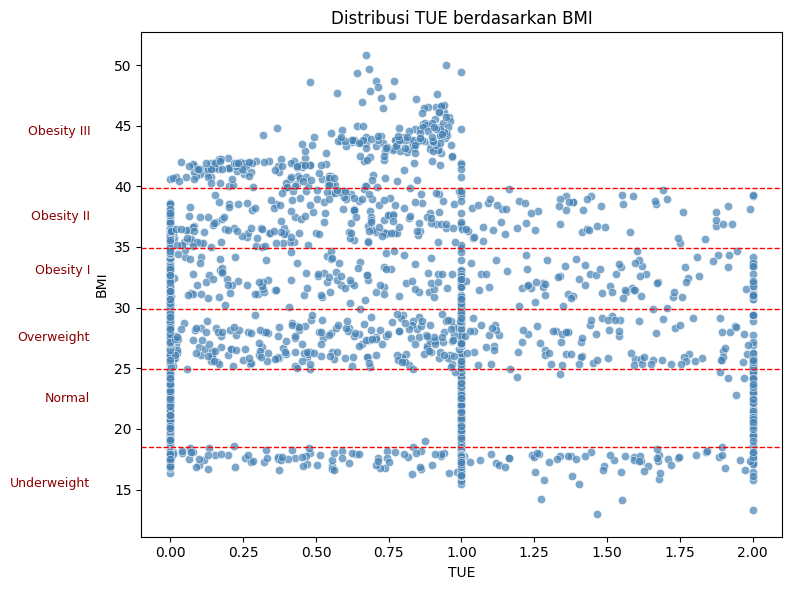

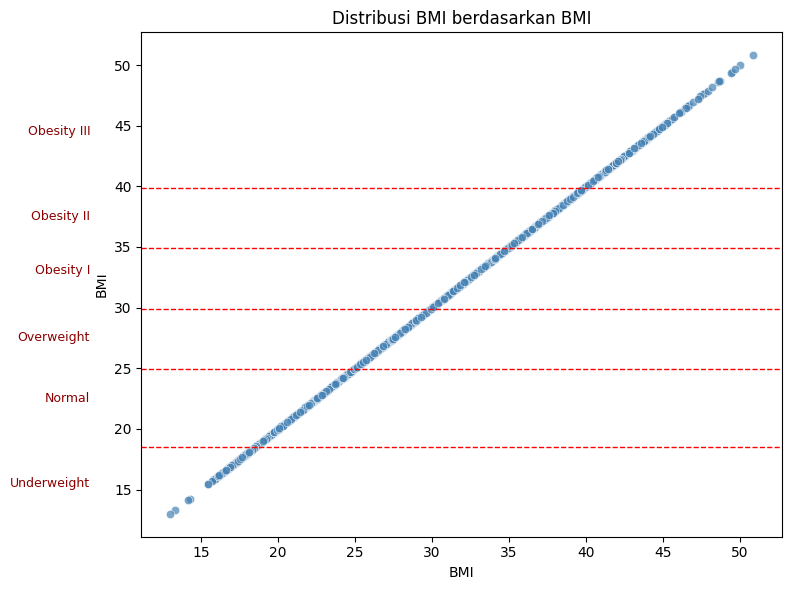

In [15]:
# Batas dan label kategori BMI
bmi_thresholds = [18.5, 24.9, 29.9, 34.9, 39.9]
bmi_labels = [
    ("Underweight", 15),
    ("Normal", 22),
    ("Overweight", 27),
    ("Obesity I", 32.5),
    ("Obesity II", 37),
    ("Obesity III", 44)
]

for column in numerical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=column, y='BMI', alpha=0.7, color='steelblue')
    plt.title(f'Distribusi {column} berdasarkan BMI')
    plt.xlabel(column)
    plt.ylabel('BMI')

    # Tambahkan garis horizontal batas kategori
    for val in bmi_thresholds:
        plt.axhline(y=val, color='red', linestyle='--', linewidth=1)

    # Dapatkan batas kiri grafik
    ax = plt.gca()
    x_min, x_max = ax.get_xlim()

    # Geser teks ke kiri di luar grafik
    offset = (x_max - x_min) * 0.08  # sesuaikan jarak (semakin besar makin jauh)
    x_label_pos = x_min - offset

    # Tambahkan label kategori di luar area plot
    for label, y_pos in bmi_labels:
        plt.text(
            x=x_label_pos,
            y=y_pos,
            s=label,
            color='darkred',
            fontsize=9,
            va='bottom',
            ha='right',
            backgroundcolor='white'
        )

    plt.tight_layout()
    plt.show()


### Distribusi categorical data berdasarkan Level Obesitas (NObeyesdad)

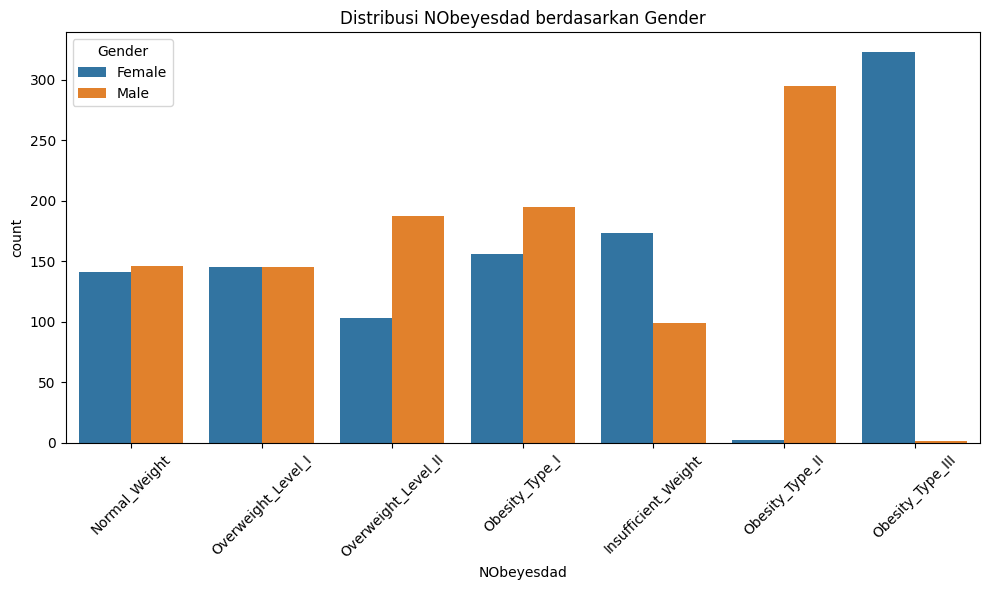

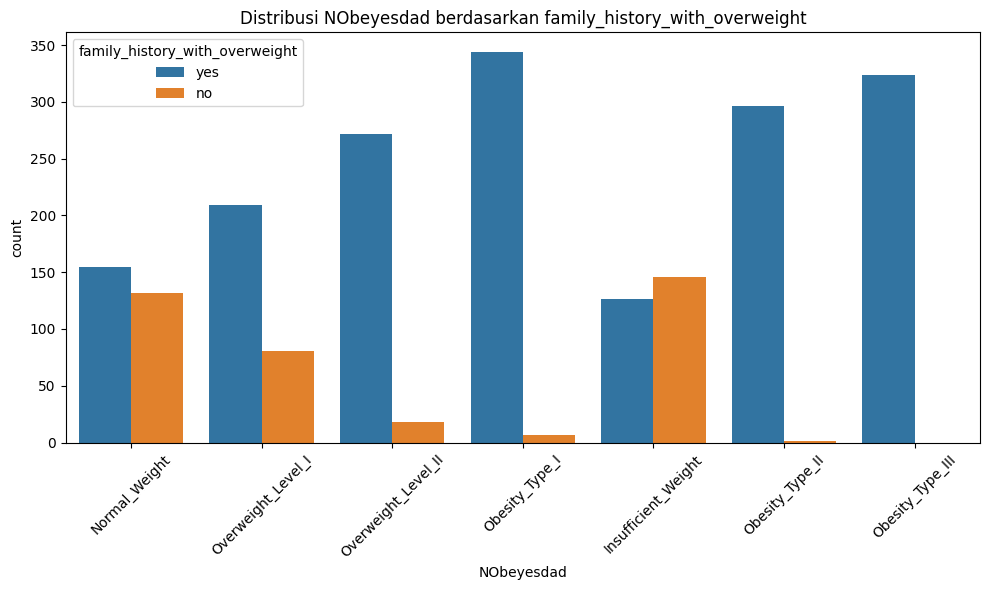

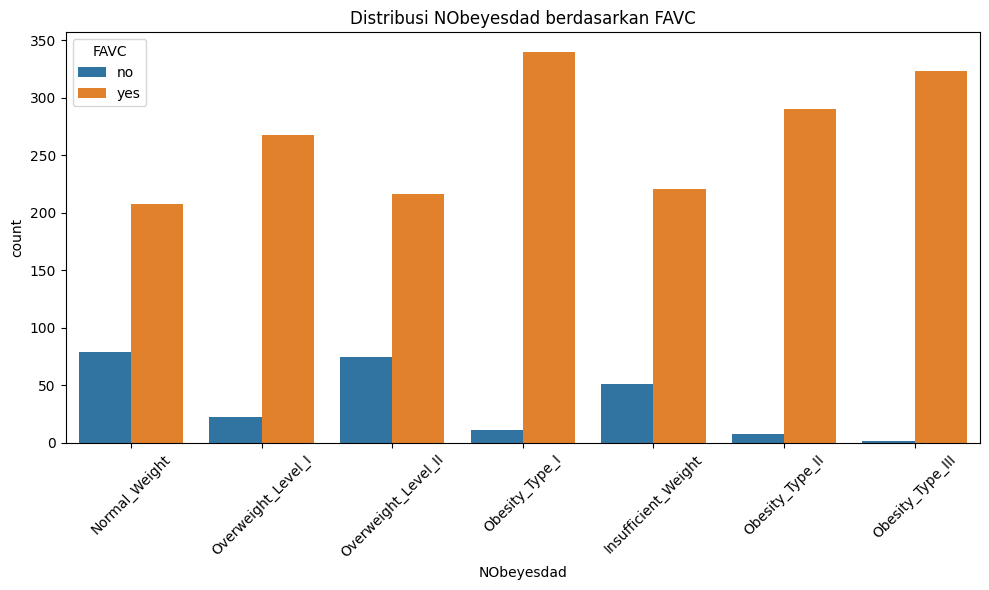

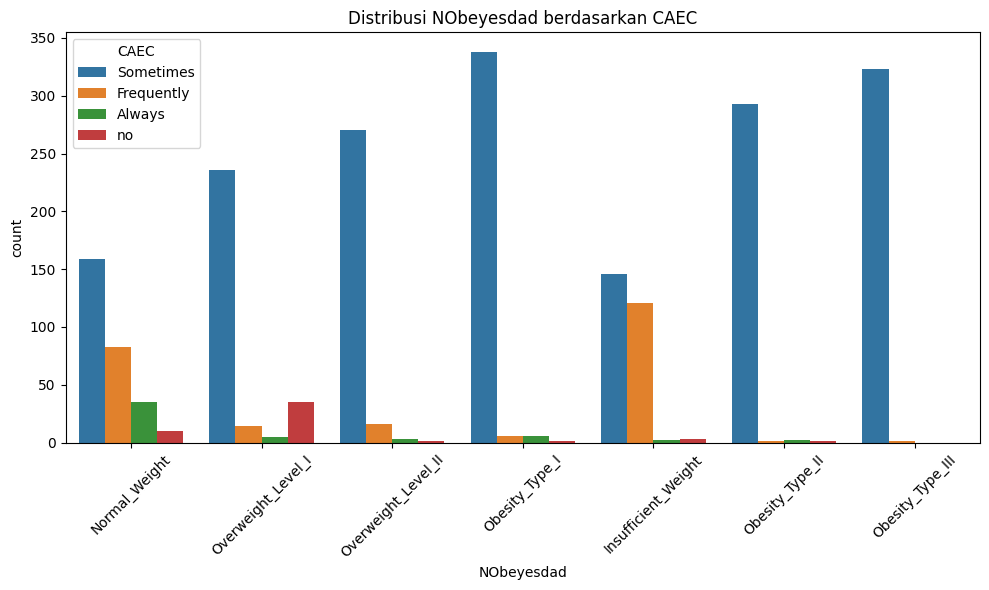

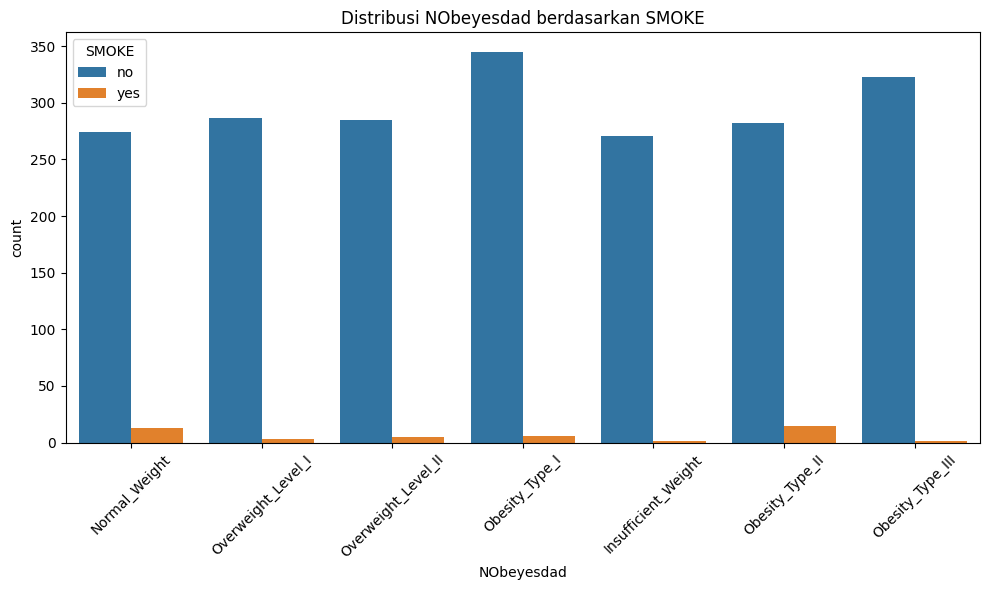

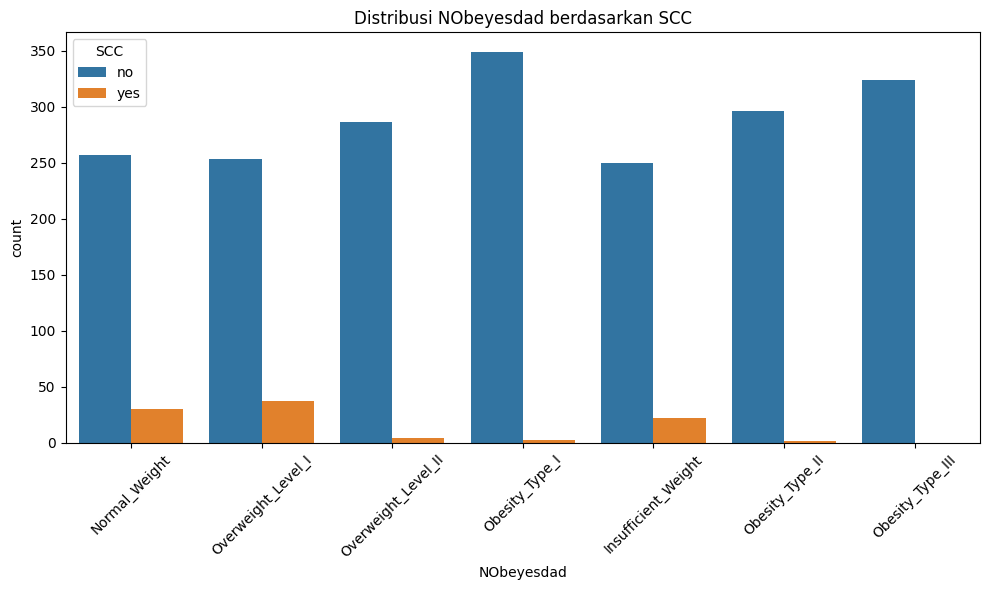

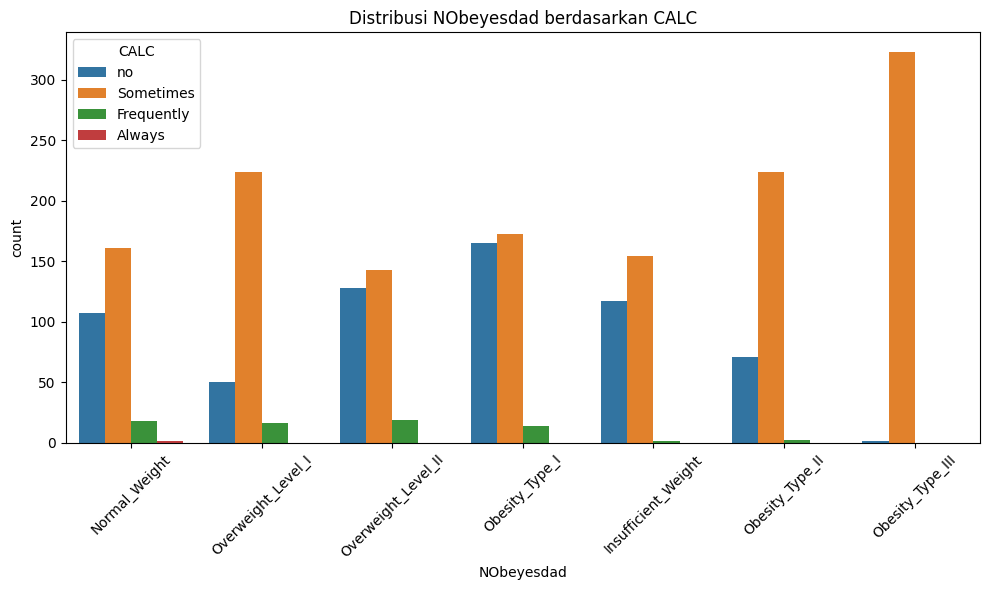

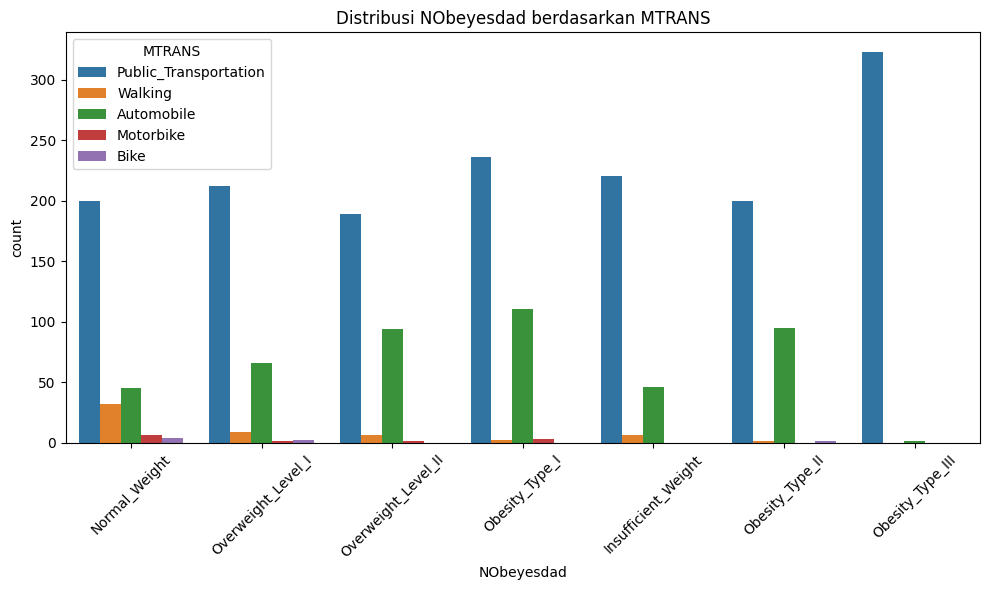

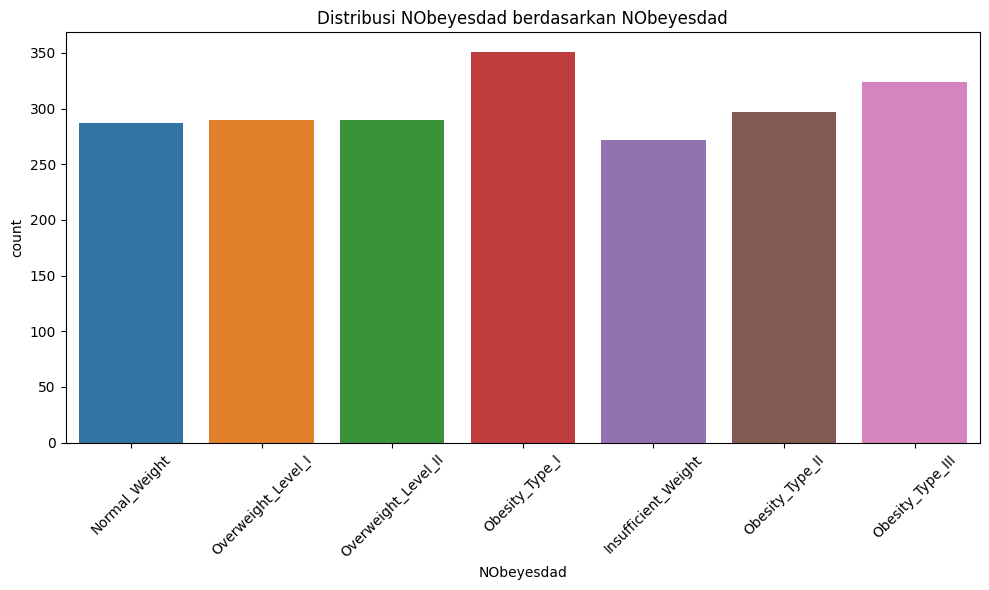

In [16]:
#Distribusi categorical data berdasarkan NObeyesdad

for column in categorical_data.columns: 
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='NObeyesdad', hue=column)
    plt.title(f'Distribusi NObeyesdad berdasarkan {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Korelasi Fitur Numerik

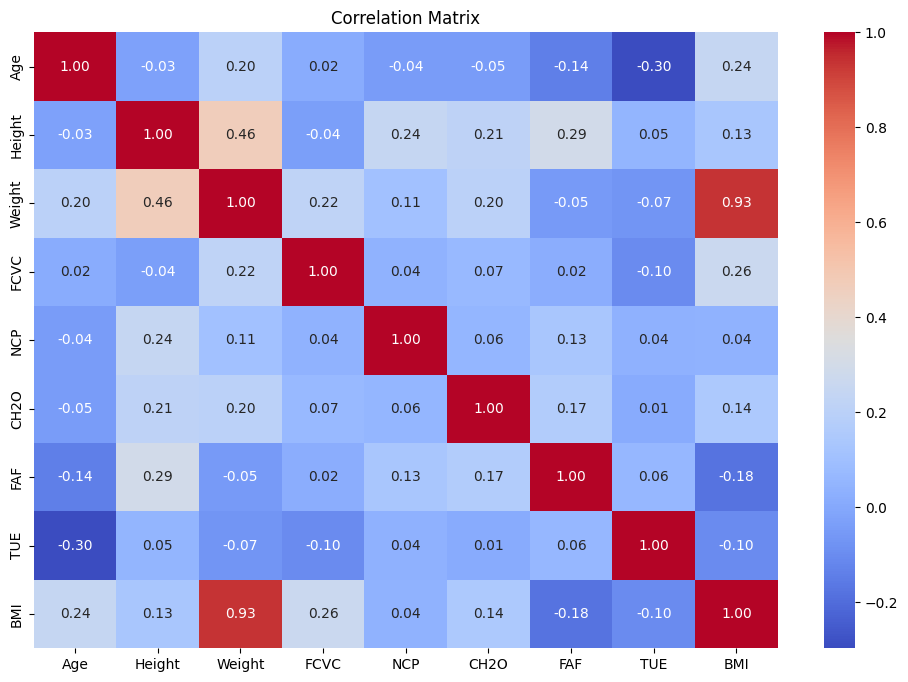

In [17]:
#correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#  Melihat Hubungan antara Weight dan Height serta Age Vs BMI based berdasarkan NObeyesdad

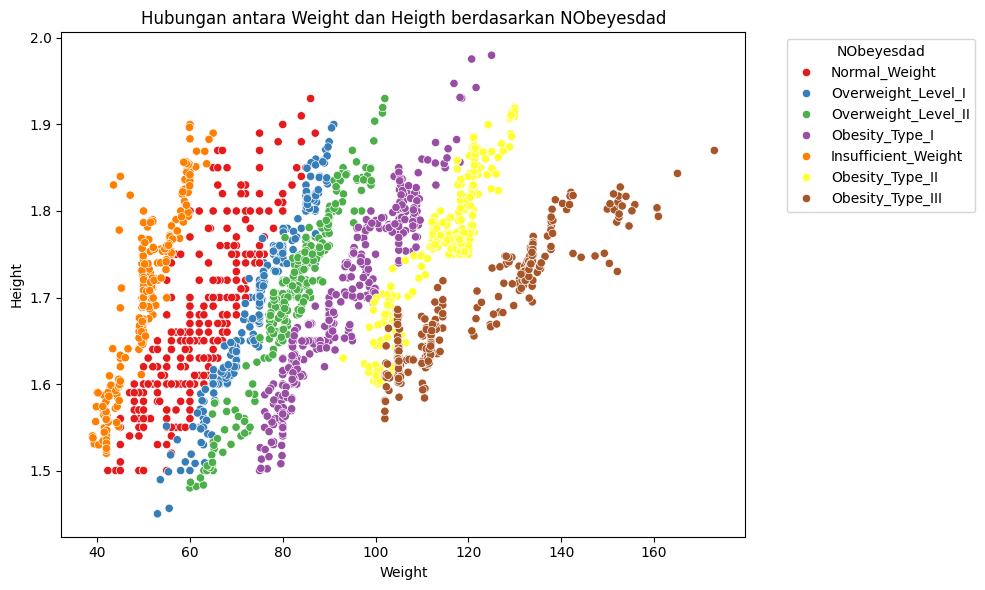

In [18]:
# Visualisasi hubungan antara Weight dan Height berdasarkan NObeyesdad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='Height', hue='NObeyesdad', palette='Set1')
plt.title('Hubungan antara Weight dan Heigth berdasarkan NObeyesdad')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(title='NObeyesdad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

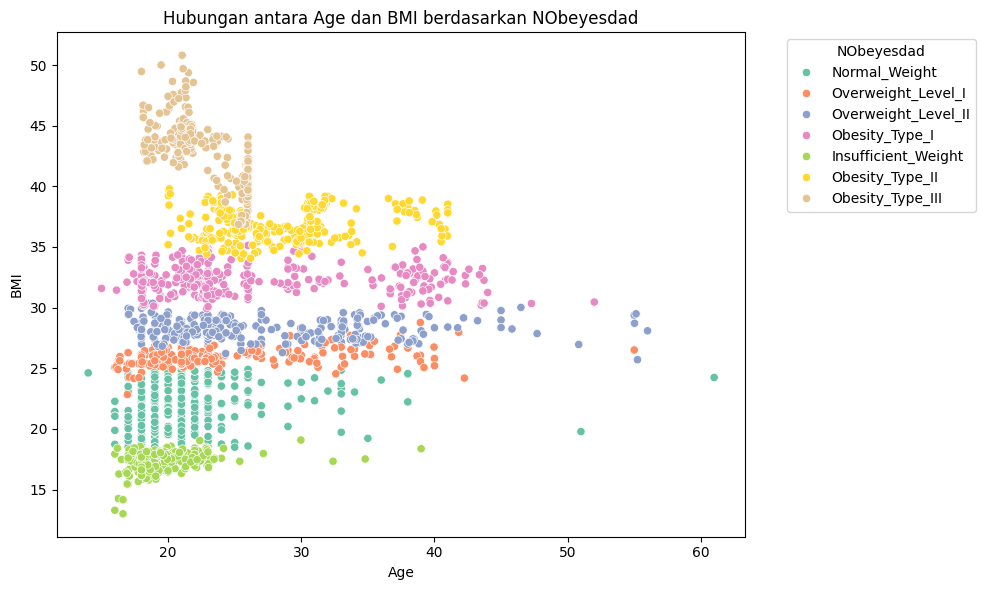

In [19]:
# Age Vs BMI based on NObeyesdad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='NObeyesdad', palette='Set2')
plt.title('Hubungan antara Age dan BMI berdasarkan NObeyesdad')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='NObeyesdad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()